In [28]:
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

In [3]:
data.head()

,ID,IVDur,Q1,Q2,Q75,Q75_1N,Q76,Q76_1N,Q5_1T,Q66,...,victim_is_compensated,victim_is_reconciliation,victim_is_told_anyone,offender_is_male,offender_is_on_duty,offender_is_alone,offender_is_familiar,offender_is_drug_intoxicated,offender_relationship,offender_relationship_grouped
0,12646573,544,1,57,1,2.0,2.0,NaN,полтора года тому назад,1.0,...,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12658422,1643,1,59,1,4.0,1.0,2.0,открытый грабеж-выхватили сумку с документами ...,2.0,...,0.0,0.0,1.0,1.0,NaN,0.0,0.0,0.0,8.0,6.0
2,12660336,676,1,35,1,1.0,2.0,NaN,"покупка на авито ,мы отправили деньги ,но нам...",1.0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12664831,510,1,22,1,1.0,2.0,NaN,украли телефон,2.0,...,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12666214,1107,1,79,1,3.0,2.0,NaN,"мошенничество,говорят и звонят я твой сын и до...",1.0,...,0.0,NaN,1.0,1.0,NaN,1.0,0.0,0.0,8.0,6.0


In [5]:
len(data.columns), data.columns

(189,
 Index(['ID', 'IVDur', 'Q1', 'Q2', 'Q75', 'Q75_1N', 'Q76', 'Q76_1N', 'Q5_1T',
        'Q66',
        ...
        'victim_is_compensated', 'victim_is_reconciliation',
        'victim_is_told_anyone', 'offender_is_male', 'offender_is_on_duty',
        'offender_is_alone', 'offender_is_familiar',
        'offender_is_drug_intoxicated', 'offender_relationship',
        'offender_relationship_grouped'],
       dtype='object', length=189))

In [10]:
data.isna().sum(axis=0)

ID                                          0
IVDur                                       0
Q1                                          0
Q2                                          0
Q75                                         0
Q75_1N                                  13817
Q76                                     13817
Q76_1N                                  15530
Q5_1T                                       9
Q66                                     13817
Q14                                     14720
Q1414                                   15915
Q18                                     13817
Q15                                     13817
Q16                                     13817
Q77                                     16216
Q17                                     13817
Q19_1                                   13817
Q19_2                                   13817
Q19_3                                   13817
Q19_4                                   13817
Q19_5                             

In [22]:
print('isna: ', data.Q75.isna().sum())
print(data.Q75.value_counts())

isna:  0
2    13776
1     3001
3       41
Name: Q75, dtype: int64


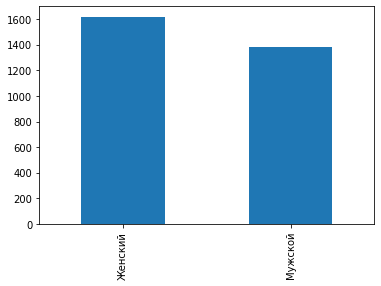

In [34]:
data[data.Q75 == 1].Q1.value_counts().rename({1: 'Женский', 2: 'Мужской'}).plot(kind='bar')

plt.show()

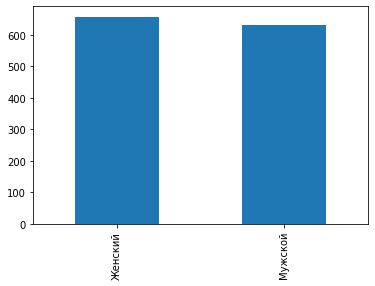

In [35]:
data[data.Q76 == 1].Q1.value_counts().rename({1: 'Женский', 2: 'Мужской'}).plot(kind='bar')

plt.show()

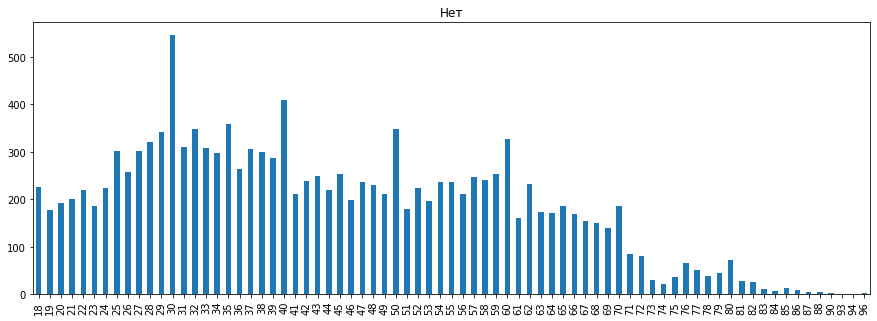

In [49]:
ax = data[data.Q75 == 2].Q2.value_counts().sort_index().plot(kind='bar', figsize=(15, 5))
ax.set_title('Нет')

plt.show()

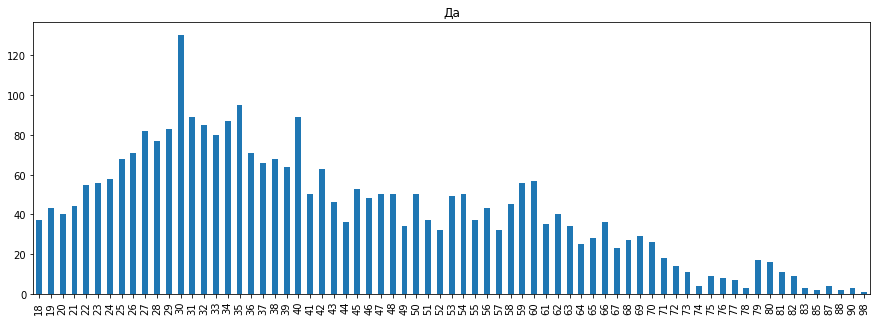

In [50]:
ax = data[data.Q75 == 1].Q2.value_counts().sort_index().plot(kind='bar', figsize=(15, 5))
ax.set_title('Да')

plt.show()

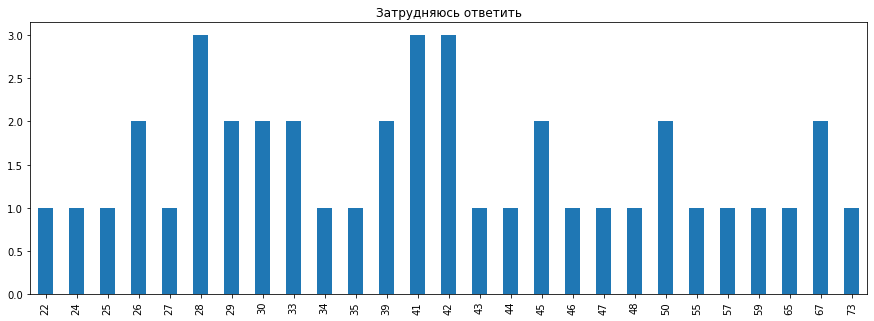

In [51]:
ax = data[data.Q75 == 3].Q2.value_counts().sort_index().plot(kind='bar', figsize=(15, 5))
ax.set_title('Затрудняюсь ответить')

plt.show()

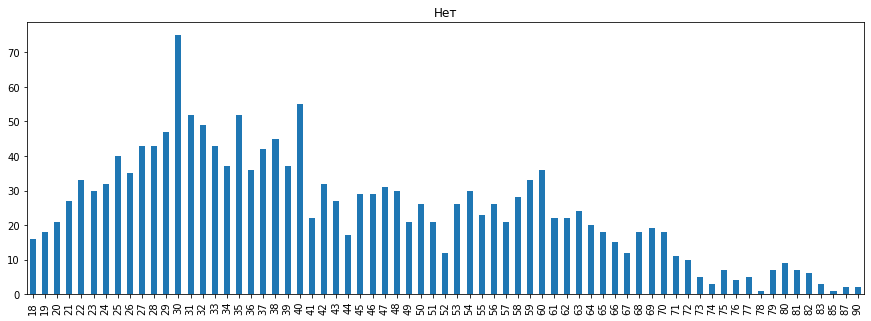

In [52]:
ax = data[data.Q76 == 2].Q2.value_counts().sort_index().plot(kind='bar', figsize=(15, 5))
ax.set_title('Нет')

plt.show()

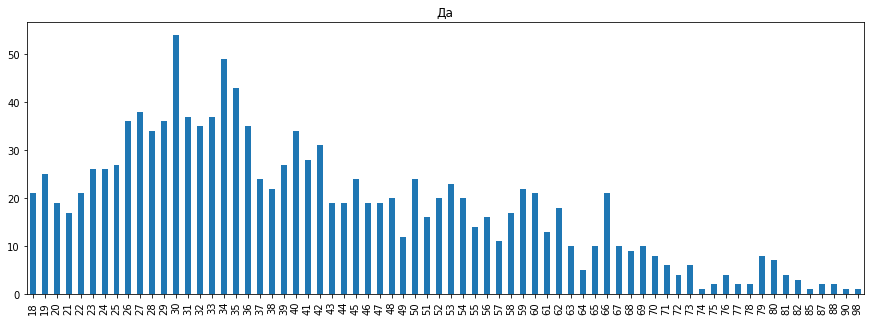

In [53]:
ax = data[data.Q76 == 1].Q2.value_counts().sort_index().plot(kind='bar', figsize=(15, 5))
ax.set_title('Да')

plt.show()

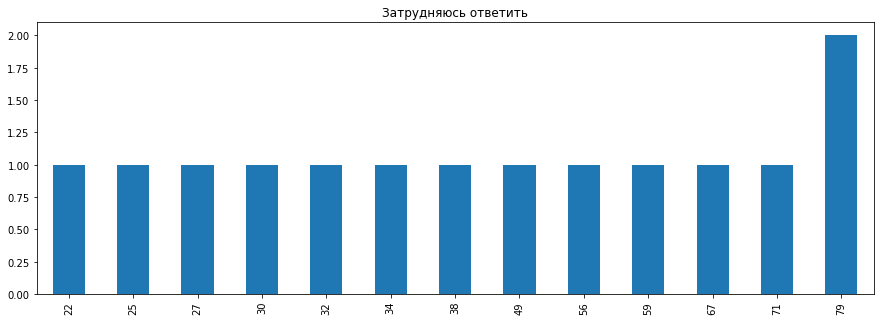

In [54]:
ax = data[data.Q76 == 3].Q2.value_counts().sort_index().plot(kind='bar', figsize=(15, 5))
ax.set_title('Затрудняюсь ответить')

plt.show()

# Предположения

<b>Сравнить ответы людей, с которыми что-то случилось за последний год и за 5 лет (время преступления, где они находились, степень тяжест преступления)</b>

In [67]:
group_yes = data[data.Q75 == 1]
group_year = group_yes[group_yes.Q76 == 1]
group_5years = group_yes[(group_yes.Q76 == 2) & (group_yes.Q75 == 1)]

group_no = data[data.Q75 == 2]

group_yes.shape[0], group_year.shape[0], group_5years.shape[0], group_no.shape[0]

(3001, 1288, 1699, 13776)

Уже видно, что за последний год преступлений было примерно столько же, сколько за предыдущие 4 года, что странно.

In [98]:
sex_rename = {1: 'Женский', 2: 'Мужской'}

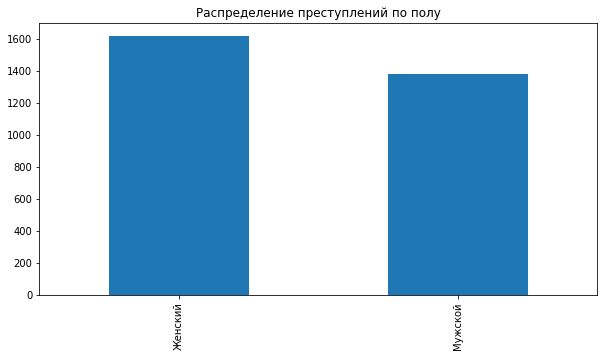

In [99]:
ax = group_yes.Q1.value_counts().rename(sex_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Распределение преступлений по полу')

plt.show()

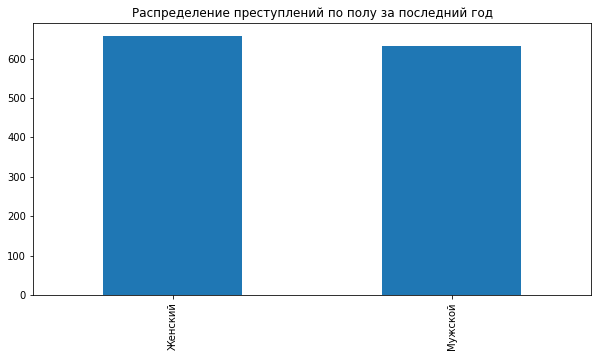

In [100]:
ax = group_year.Q1.value_counts().rename(sex_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Распределение преступлений по полу за последний год')

plt.show()

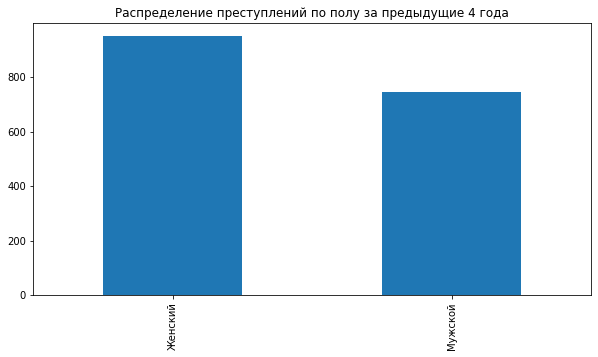

In [101]:
ax = group_5years.Q1.value_counts().rename(sex_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Распределение преступлений по полу за предыдущие 4 года')

plt.show()

In [82]:
month_rename = {
    1: 'Январь',
    2: 'Февраль',
    3: 'Март',
    4: 'Апрель',
    5: 'Май',
    6: 'Июнь',
    7: 'Июль',
    8: 'Август',
    9: 'Сентябрь',
    10: 'Октябрь',
    11: 'Ноябрь',
    12: 'Декабрь',
    13: 'Неизвестно'
}

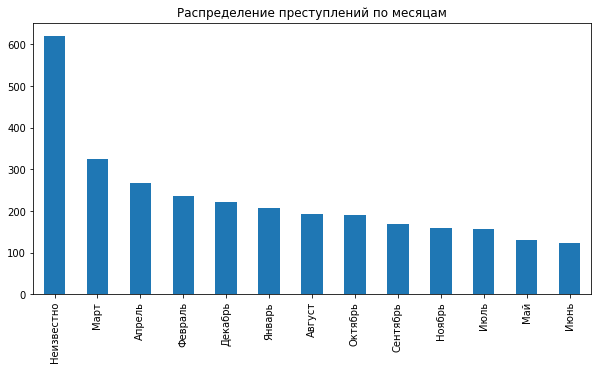

In [83]:
ax = group_yes.Q16.value_counts().rename(month_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Распределение преступлений по месяцам')

plt.show()

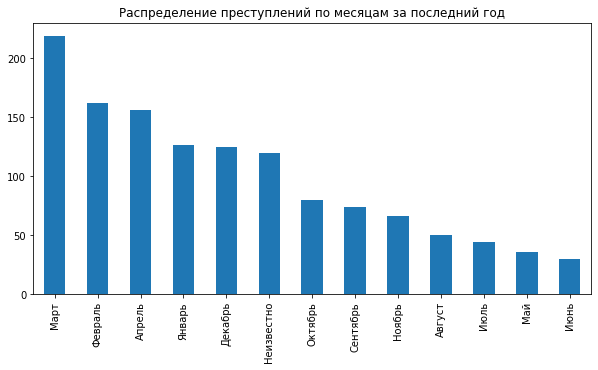

In [84]:
ax = group_year.Q16.value_counts().rename(month_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Распределение преступлений по месяцам за последний год')

plt.show()

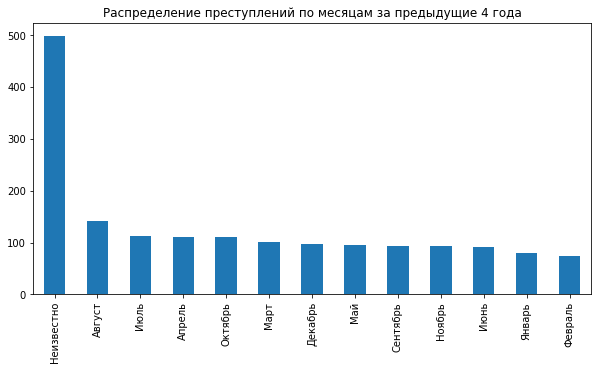

In [85]:
ax = group_5years.Q16.value_counts().rename(month_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Распределение преступлений по месяцам за предыдущие 4 года')

plt.show()

In [87]:
season_rename = {
    1: 'Зима',
    2: 'Весна',
    3: 'Лето',
    4: 'Осень',
    5: 'Неизвестно',
}

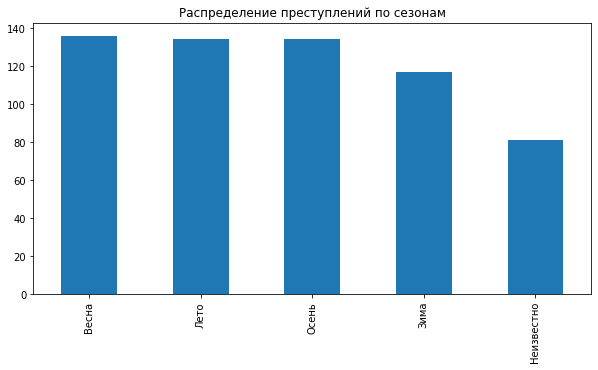

In [89]:
ax = group_yes.Q77.value_counts().rename(season_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Распределение преступлений по сезонам')

plt.show()

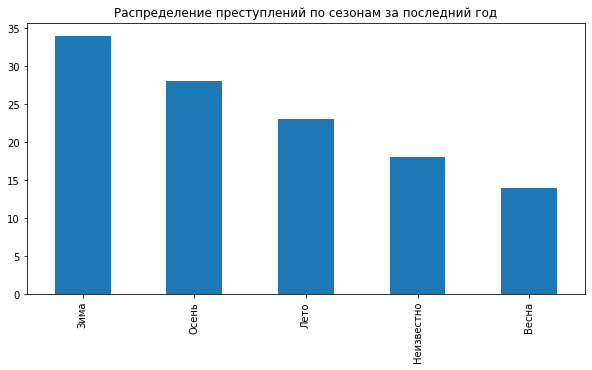

In [91]:
ax = group_year.Q77.value_counts().rename(season_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Распределение преступлений по сезонам за последний год')

plt.show()

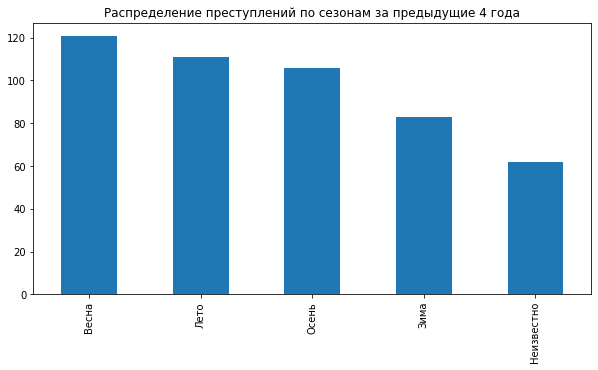

In [92]:
ax = group_5years.Q77.value_counts().rename(season_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Распределение преступлений по сезонам за предыдущие 4 года')

plt.show()

In [93]:
place_rename = {
    1: 'Квартира или дом',
    2: 'На работе или на учёбе (школа, университет, детский сад, техникум)',
    3: 'В подъезде или во дворе',
    4: 'На улице, дороге, парковке',
    5: 'Общественные здания (магазины, кафе, банки, поликлиники)',
    6: 'Дом или квартира знакомых или родственников',
    7: 'Дача',
    8: 'На транспорте (в такси, на вокзале, в поезде, самолёте)',
    9: 'В закрытом учреждении (армия, больница, ИК и т.д.)',
    10: 'В автомобиле',
    11: 'Другое',
    12: 'На природе, в лесу или парке',
    13: 'Невозможно сказать (напр., украли деньги с банковской карты)',
    14: 'Затрудняюсь ответить / не помню',
}

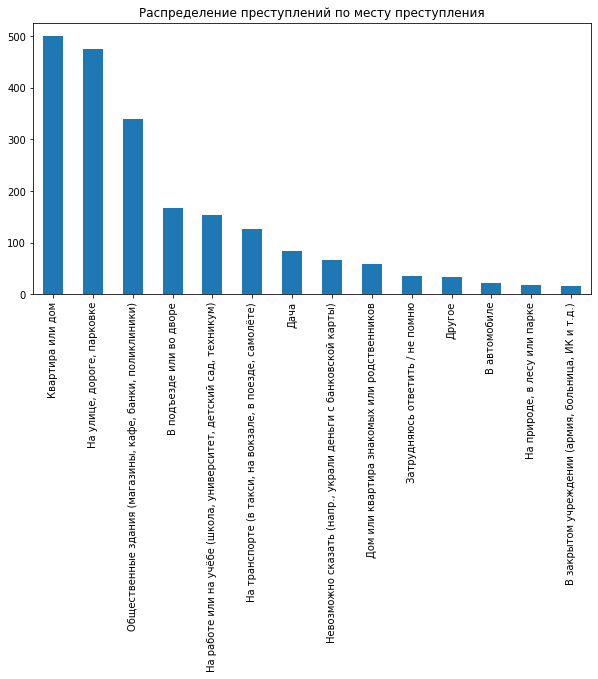

In [94]:
ax = group_yes.Q14.value_counts().rename(place_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Распределение преступлений по месту преступления')

plt.show()

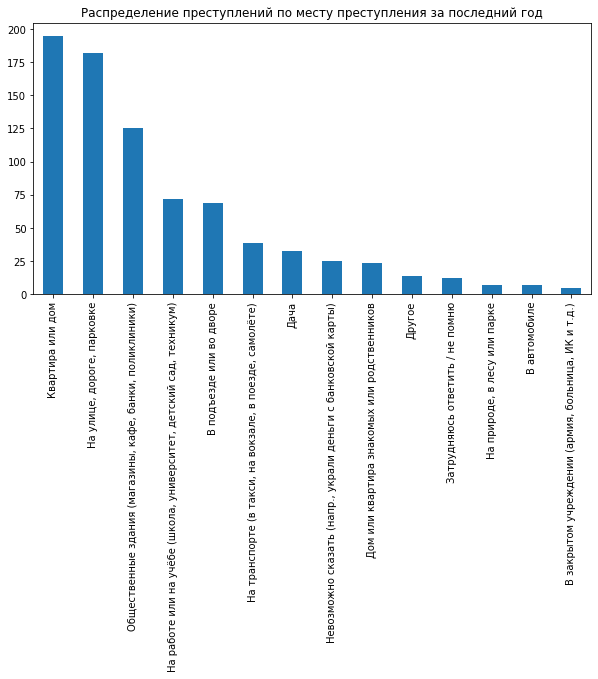

In [95]:
ax = group_year.Q14.value_counts().rename(place_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Распределение преступлений по месту преступления за последний год')

plt.show()

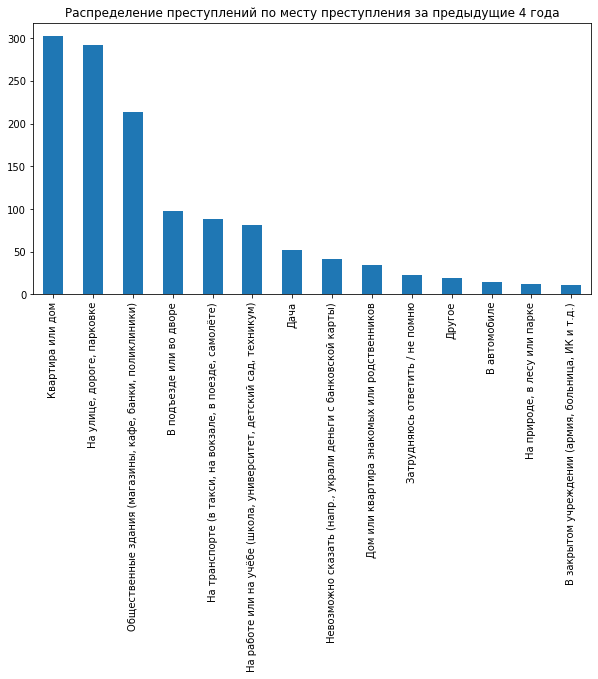

In [96]:
ax = group_5years.Q14.value_counts().rename(place_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Распределение преступлений по месту преступления за предыдущие 4 года')

plt.show()

In [104]:
yes_no_rename = {
    1: 'Да',
    2: 'Нет',
    3: 'Неизвестно'
}

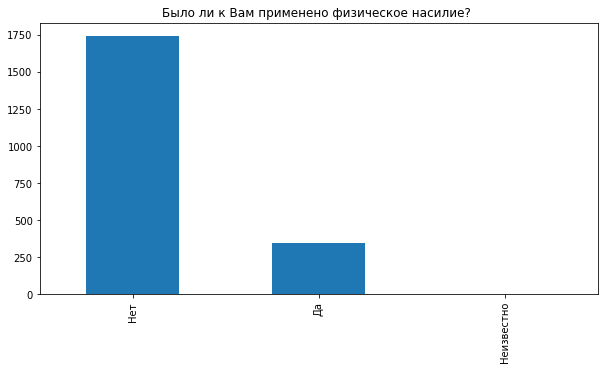

In [106]:
ax = group_yes.Q24.value_counts().rename(yes_no_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Было ли к Вам применено физическое насилие? ')

plt.show()

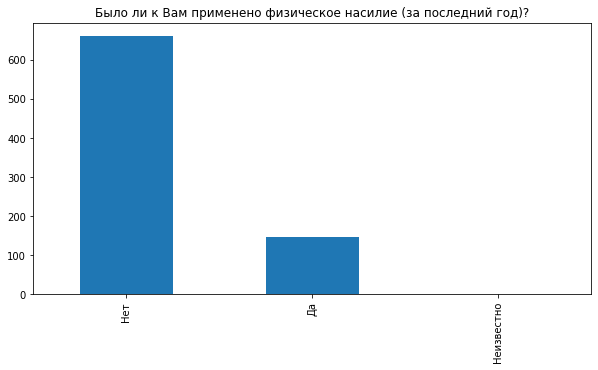

In [108]:
ax = group_year.Q24.value_counts().rename(yes_no_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Было ли к Вам применено физическое насилие (за последний год)?')

plt.show()

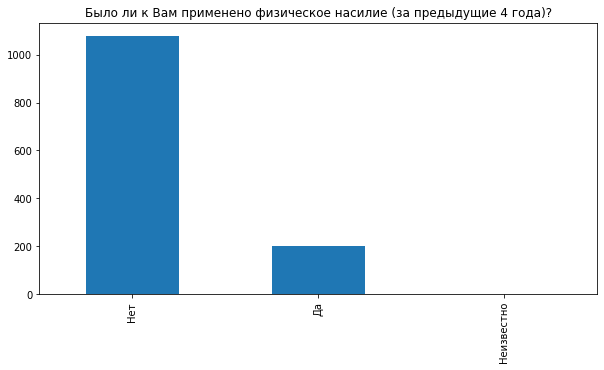

In [109]:
ax = group_5years.Q24.value_counts().rename(yes_no_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Было ли к Вам применено физическое насилие (за предыдущие 4 года)?')

plt.show()

In [110]:
fiend_rename = {
    1: 'Друг, подруга',
    2: 'Другой знакомый',
    3: 'Затрудняюсь ответить / не помню',
    4: 'Коллега',
    5: 'Незнакомец',
    6: 'Родственник',
    7: 'Сожитель',
    8: 'Сосед или соседка',
    9: 'Супруг или супруга',
}

In [133]:
offender_relationship_grouped_rename = {
    1: 'Супруги и сожители',
    2: 'Друзья и родственники',
    3: 'Коллега',
    4: 'Сосед или соседка',
    5: 'Дальние и случайные знакомые',
    6: 'Незнакомец'
}

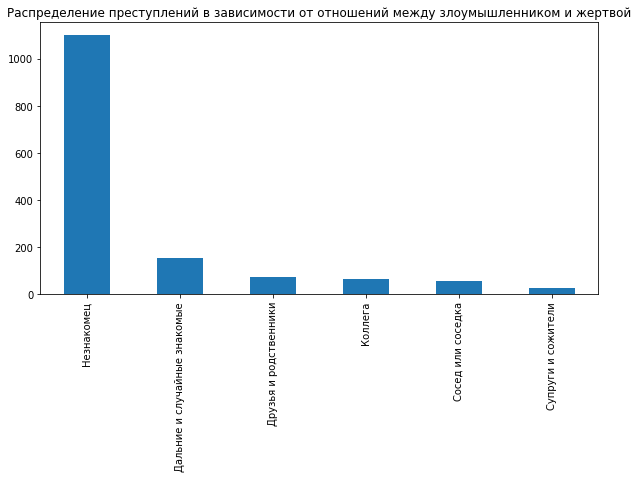

In [134]:
ax = group_yes.offender_relationship_grouped.value_counts().rename(offender_relationship_grouped_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Распределение преступлений в зависимости от отношений между злоумышленником и жертвой')

plt.show()

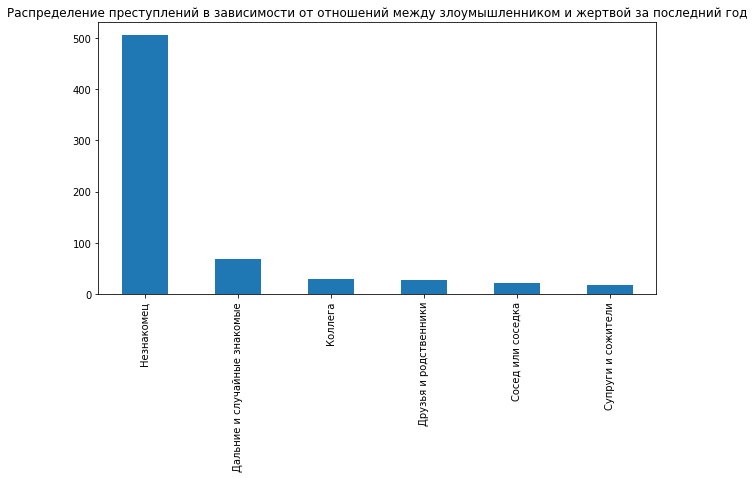

In [135]:
ax = group_year.offender_relationship_grouped.value_counts().rename(offender_relationship_grouped_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Распределение преступлений в зависимости от отношений между злоумышленником и жертвой за последний год')

plt.show()

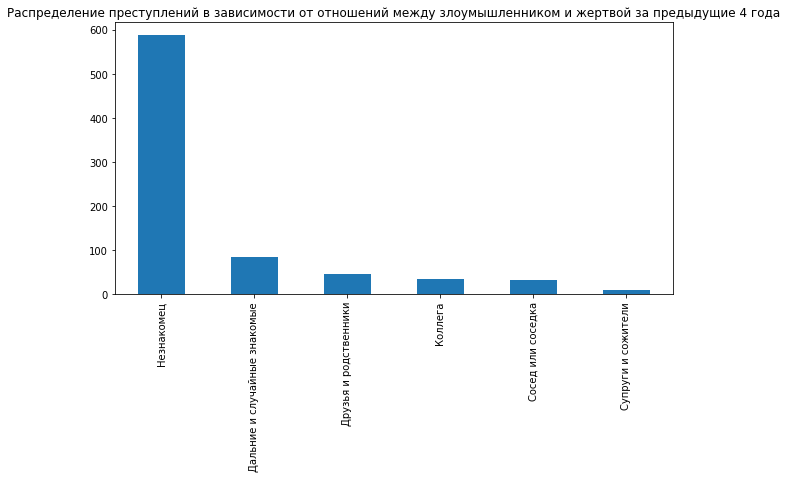

In [136]:
ax = group_5years.offender_relationship_grouped.value_counts().rename(offender_relationship_grouped_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Распределение преступлений в зависимости от отношений между злоумышленником и жертвой за предыдущие 4 года')

plt.show()

In [114]:
judge_rename = {
    1: 'Да',
    2: 'Нет',
    3: 'Дело еще в процессе',
    4: 'Неизвестно' 
}

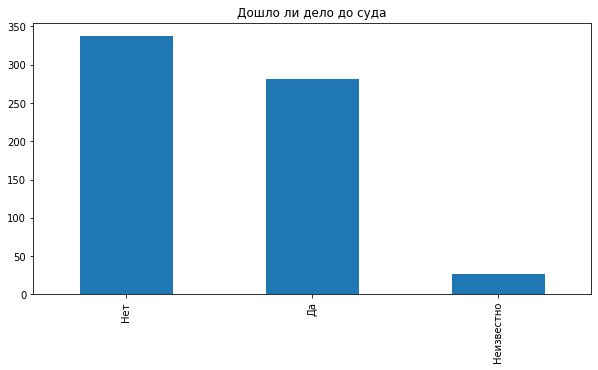

In [124]:
judge_data = group_yes.Q68.copy()
judge_data[judge_data == 3] = 1

ax = judge_data.value_counts().rename(judge_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Дошло ли дело до суда')

plt.show()

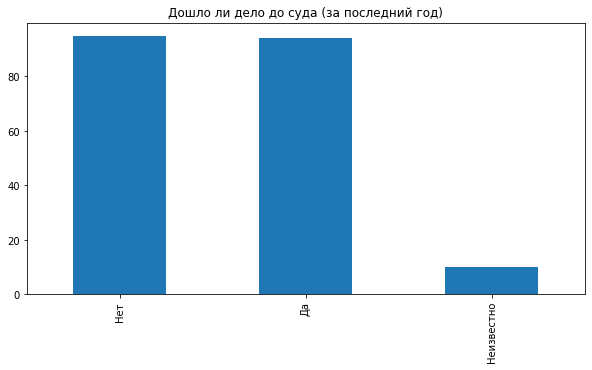

In [125]:
judge_data = group_year.Q68.copy()
judge_data[judge_data == 3] = 1

ax = judge_data.value_counts().rename(judge_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Дошло ли дело до суда (за последний год)')

plt.show()

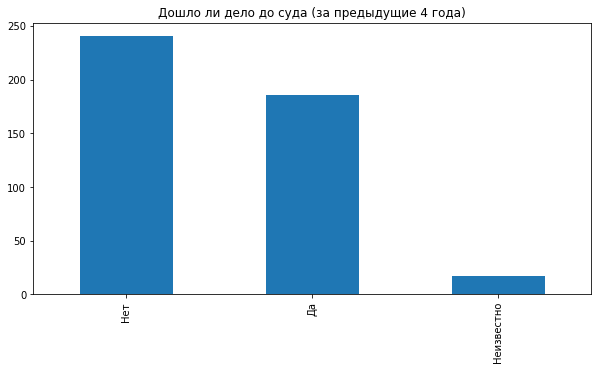

In [126]:
judge_data = group_5years.Q68.copy()
judge_data[judge_data == 3] = 1

ax = judge_data.value_counts().rename(judge_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Дошло ли дело до суда (за предыдущие 4 года)')

plt.show()

In [137]:
crime_type_rename = {
    1: 'Нападение',
    2: 'Угрозы',
    3: 'Грабеж и разбой',
    4: 'Кража',
    5: 'Мошенничество',
    6: 'Удаленное мошенничество',
    7: 'Прочее',
    8: 'Недостаточно информации',
}

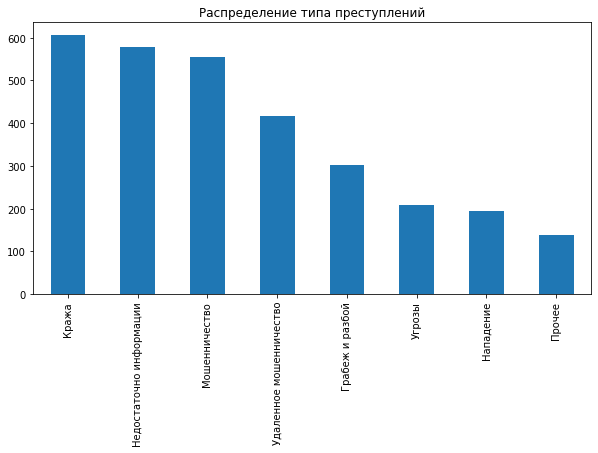

In [141]:
ax = group_yes.crime_type.value_counts().rename(crime_type_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Распределение типа преступлений')

plt.show()

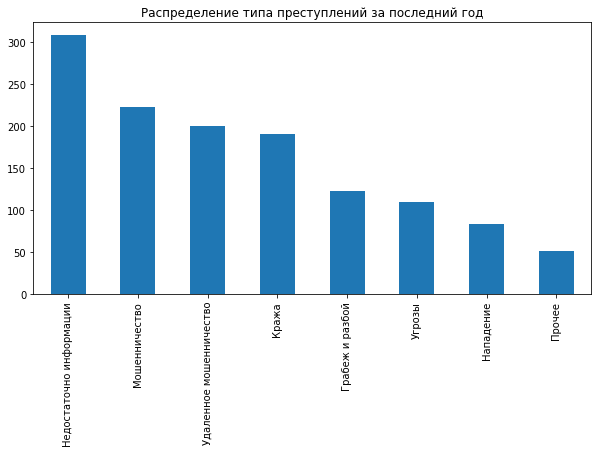

In [142]:
ax = group_year.crime_type.value_counts().rename(crime_type_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Распределение типа преступлений за последний год')

plt.show()

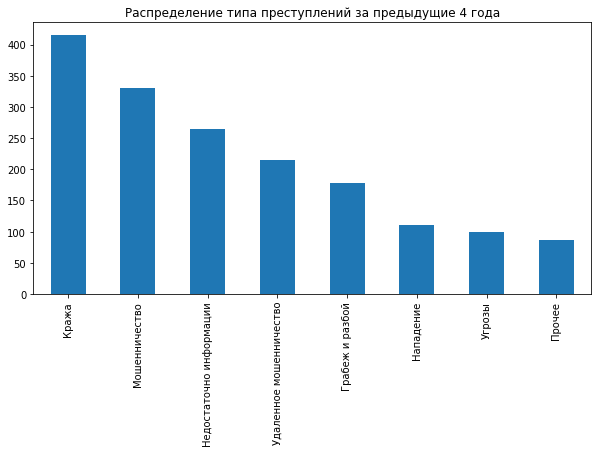

In [143]:
ax = group_5years.crime_type.value_counts().rename(crime_type_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Распределение типа преступлений за предыдущие 4 года')

plt.show()

In [214]:
resp_ses_rename = {
    1: 'Безработный',
    2: 'Пенсионер',
    3: 'Студент',
    4: 'Рабочий',
    5: 'Служащий',
    6: 'Руководитель', 
}

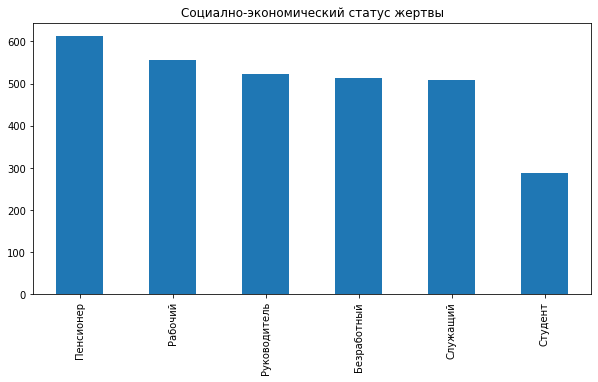

In [215]:
ax = group_yes.resp_ses.value_counts().rename(resp_ses_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Социално-экономический статус жертвы')

plt.show()

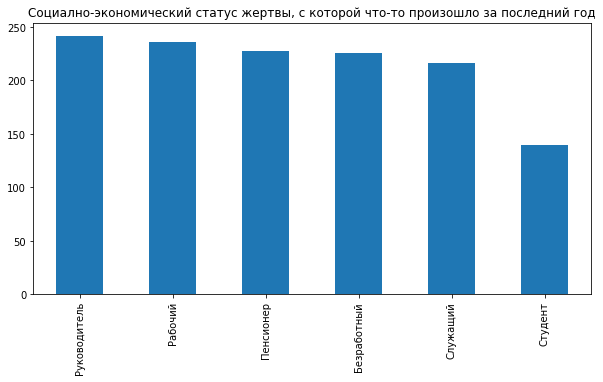

In [216]:
ax = group_year.resp_ses.value_counts().rename(resp_ses_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Социално-экономический статус жертвы, с которой что-то произошло за последний год')

plt.show()

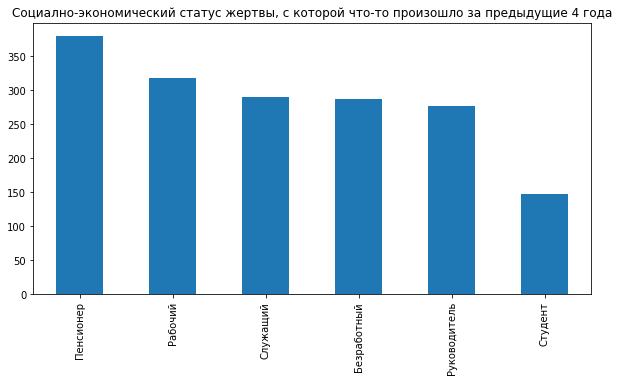

In [217]:
ax = group_5years.resp_ses.value_counts().rename(resp_ses_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Социално-экономический статус жертвы, с которой что-то произошло за предыдущие 4 года')

plt.show()

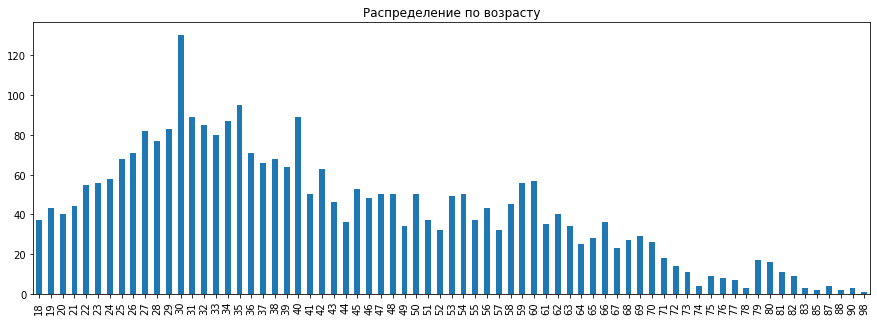

In [128]:
ax = group_yes.Q2.value_counts().sort_index().plot(kind='bar', figsize=(15, 5))
ax.set_title('Распределение по возрасту')

plt.show()

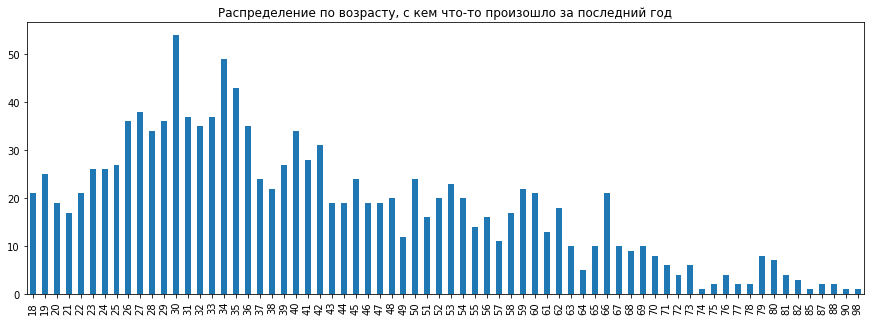

In [130]:
ax = group_year.Q2.value_counts().sort_index().plot(kind='bar', figsize=(15, 5))
ax.set_title('Распределение по возрасту, с кем что-то произошло за последний год')

plt.show()

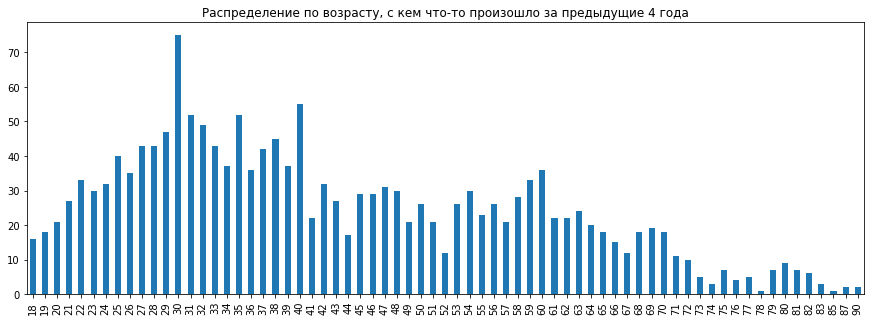

In [131]:
ax = group_5years.Q2.value_counts().sort_index().plot(kind='bar', figsize=(15, 5))
ax.set_title('Распределение по возрасту, с кем что-то произошло за предыдущие 4 года')

plt.show()

<b>Проверить занятость оветивших. Возможно, другие не отвечали, потому что были на работе.</b>

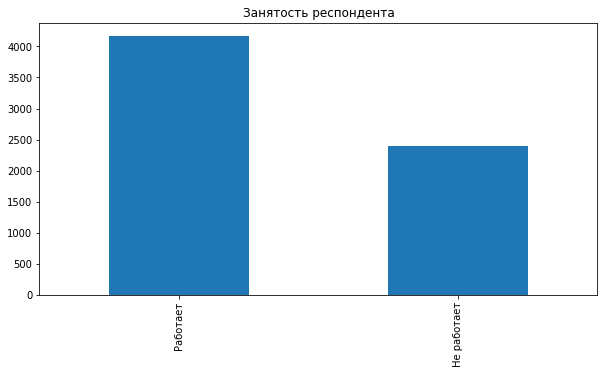

In [158]:
work_rename = {
    1: 'Работает',
    2: 'Не работает',
}

ax = data.Q58.value_counts().rename(work_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Занятость респондента')

plt.show()

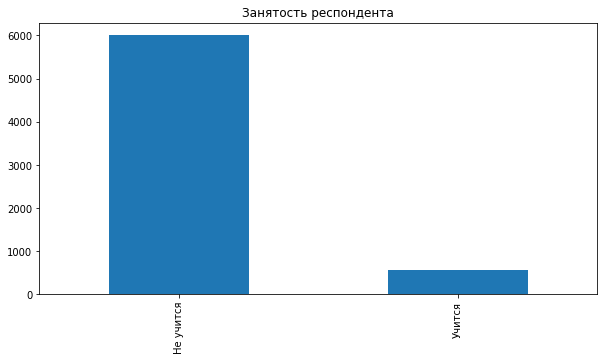

In [160]:
study_rename = {
    1: 'Учится',
    2: 'Не учится',
}

ax = data.Q69.value_counts().rename(study_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Занятость респондента')

plt.show()

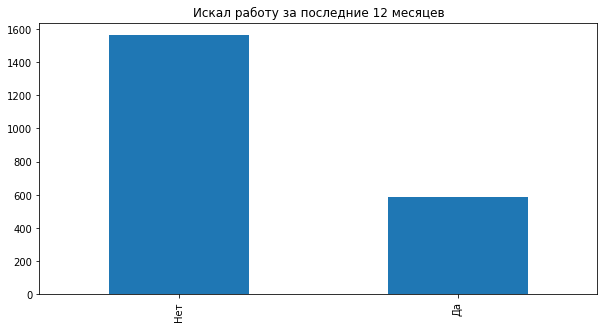

In [161]:
ax = data.Q71.value_counts().rename(yes_no_rename).plot(kind='bar', figsize=(10, 5))
ax.set_title('Искал работу за последние 12 месяцев')

plt.show()

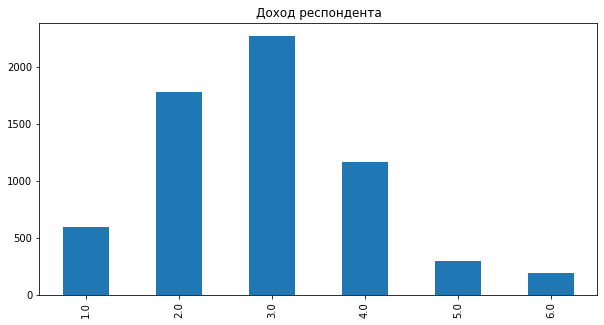

In [157]:
ax = data.Q57.value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
ax.set_title('Доход респондента')

plt.show()

<b>Сравнить суммы преступлений за год со срезом в 5 лет с данными</b>

In [166]:
import numpy as np

In [202]:
ages = np.arange(18, 99)
crimes_ages = np.zeros(len(ages))
reports_crimes_ages = np.zeros(len(ages))

for i, age in enumerate(ages):
    crimes_ages[i] = group_year.Q2.value_counts().get(age, 0)
    reports_crimes_ages[i] = group_yes.Q2.value_counts().get(age, 0)

In [203]:
cumulative_crimes_ages = np.zeros(len(ages))
for i, age in enumerate(ages):
    cumulative_crimes_ages[i] = sum(crimes_ages[max(0, i-4):i+1])

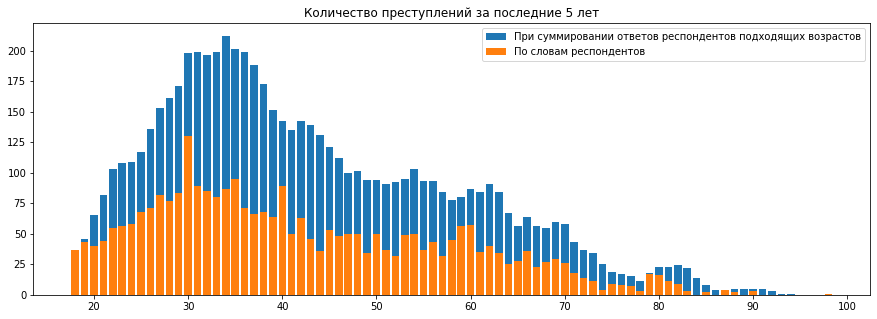

In [206]:
plt.figure(figsize=(15, 5))
plt.bar(ages, cumulative_crimes_ages, label='При суммировании ответов респондентов подходящих возрастов')
plt.bar(ages, reports_crimes_ages, label='По словам респондентов')
plt.title('Количество преступлений за последние 5 лет')
plt.legend()

plt.show()

<b>Сравнить с открытой статистикой<b>

In [207]:
len(group_yes) / len(data)

0.1784397669163991

In [208]:
len(group_year) / len(data)

0.07658461172553217

In [209]:
len(group_5years) / len(data)

0.10102271375906767

In [213]:
100 / 6

16.666666666666668

<b>Профиль преступника<b>